Problem statement

Build a relevant machine learning model to predict whether person has heart disease or not

In [ ]:
#importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/heart (1).csv')

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.shape

(918, 12)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
data.describe(include = 'O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
cat_col = data.select_dtypes(include = 'O')
cat_col.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
for i in cat_col:
  print(i , data[i].unique())
  print(data[i].value_counts())
  print('---------------')

Sex ['M' 'F']
M    725
F    193
Name: Sex, dtype: int64
---------------
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
---------------
RestingECG ['Normal' 'ST' 'LVH']
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
---------------
ExerciseAngina ['N' 'Y']
N    547
Y    371
Name: ExerciseAngina, dtype: int64
---------------
ST_Slope ['Up' 'Flat' 'Down']
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
---------------


#EDA

#Data preprocessing

In [ ]:
#null values

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#duplicates
data.duplicated().sum()

0

In [ ]:
#Encoding
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
#Sex
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df1 = pd.get_dummies(data['Sex'],prefix = 'Sex',drop_first = True)
data = pd.concat([data,df1],axis=1).drop('Sex',axis=1)

In [ ]:
#ChestPainType
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
data.loc[data['ChestPainType']=='TA','ChestPainType'] = 0

data.loc[data['ChestPainType'] == 'ATA','ChestPainType'] = 1

data.loc[data['ChestPainType'] == 'NAP','ChestPainType'] = 2

data.loc[data['ChestPainType']== 'ASY','ChestPainType'] = 3

In [ ]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,1
3,48,3,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,1


In [ ]:
#RestingECG

data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [ ]:
#ExerciseAngina
data.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data.ExerciseAngina = lb.fit_transform(data['ExerciseAngina'])

In [ ]:
#ST_Slope

data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
data.loc[data['ST_Slope']=='Down','ST_Slope'] = 0

data.loc[data['ST_Slope']=='Up','ST_Slope'] = 1
data.loc[data['ST_Slope']=='Flat','ST_Slope'] = 2


In [ ]:
data.dtypes

Age                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Sex_M               uint8
dtype: object

In [ ]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,2,172,0,0.0,1,0,1
1,49,2,160,180,0,2,156,0,1.0,2,1,0
2,37,1,130,283,0,0,98,0,0.0,1,0,1
3,48,3,138,214,0,2,108,1,1.5,2,1,0
4,54,2,150,195,0,2,122,0,0.0,1,0,1


In [ ]:
data.ChestPainType = data['ChestPainType'].astype('int64')

data.RestingECG = data['RestingECG'].astype('int64')

data.ST_Slope = data['ST_Slope'].astype('int64')

In [ ]:
data.dtypes

Age                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
Sex_M               uint8
dtype: object

#Feature selection

In [ ]:
#1. dropping the irrelevnt col  --- constant col???

#constant ?  if std() = 0
            # if any cat col has one unique value , constant col



<Axes: >

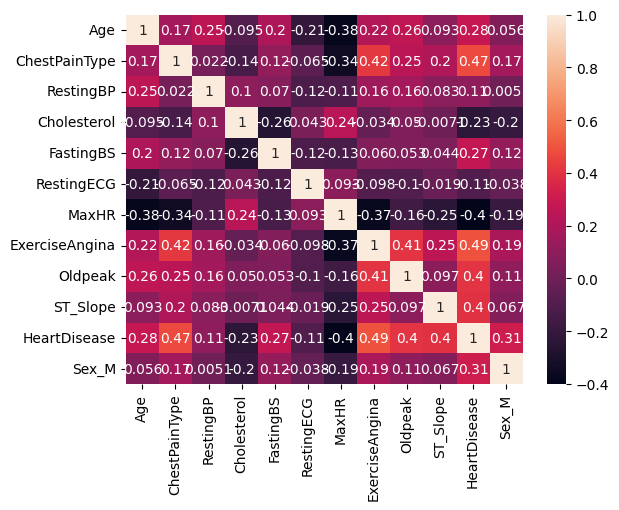

In [ ]:

#CO RELATION

sns.heatmap(data.corr(),annot=True)

#Model Building

In [ ]:
data.columns

Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Sex_M'],
      dtype='object')

In [ ]:
#split x and y

x = data.drop('HeartDisease',axis=1)
y = data.HeartDisease

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=3)

In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7463768115942029

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.7463768115942029

In [ ]:
#LR
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8985507246376812

In [ ]:
#Dt
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8152173913043478

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.894927536231884

In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=78)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.894927536231884